In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


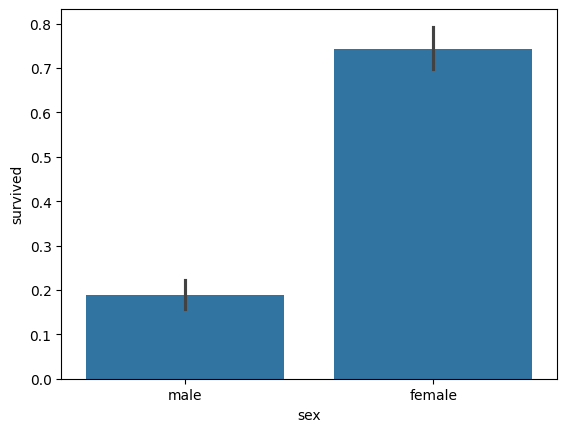

In [5]:
sns.barplot(data = df, x = "sex", y = "survived")
plt.show()

In [6]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

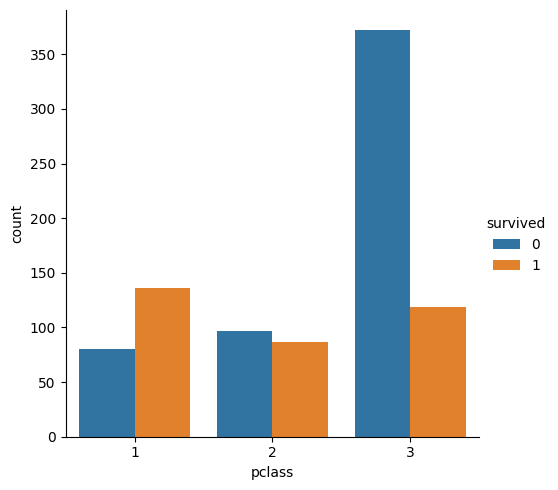

In [7]:
sns.catplot(data = df, x = "pclass", hue = "survived", kind = "count")
plt.show()

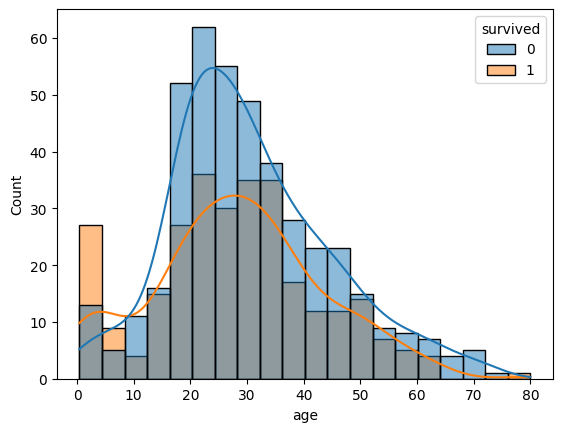

In [10]:
sns.histplot(data = df, x = "age",hue = "survived" ,kde = True)
plt.show()

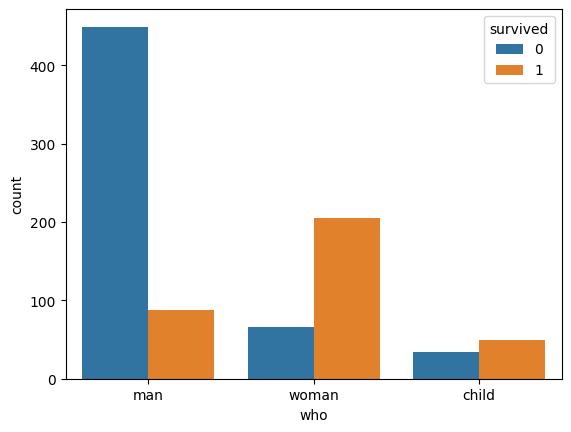

In [12]:
sns.countplot(data = df, x = "who", hue = "survived")
plt.show()

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df.drop("deck", axis = 1, inplace=True)

In [16]:
df.drop("alive", axis = 1, inplace=True)

In [17]:
df.drop("embark_town", axis = 1, inplace=True)

In [18]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [19]:
df["age"] = df["age"].fillna(df["age"].median())

In [22]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [23]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [25]:
df.nunique()

survived        2
pclass          3
sex             2
age            88
sibsp           7
parch           7
fare          248
embarked        3
class           3
who             3
adult_male      2
alone           2
dtype: int64

In [26]:
df.drop("sex", axis = 1, inplace=True)
one_hot_cols = ["embarked", "who", "class"]
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [27]:
X = df.drop("survived", axis = 1)
y = df["survived"]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=15)

In [28]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop = "first", handle_unknown="ignore"), one_hot_cols)
    ], remainder="passthrough"
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [29]:
encoded_cols = preprocessor.get_feature_names_out()

In [30]:
encoded_cols

array(['cat__embarked_Q', 'cat__embarked_S', 'cat__who_man',
       'cat__who_woman', 'cat__class_Second', 'cat__class_Third',
       'remainder__pclass', 'remainder__age', 'remainder__sibsp',
       'remainder__parch', 'remainder__fare', 'remainder__adult_male',
       'remainder__alone'], dtype=object)

In [32]:
X_train = pd.DataFrame(X_train, columns = encoded_cols)
X_test = pd.DataFrame(X_test, columns = encoded_cols)

In [33]:
X_train

,cat__embarked_Q,cat__embarked_S,cat__who_man,cat__who_woman,cat__class_Second,cat__class_Third,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__adult_male,remainder__alone
0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,27.0,0.0,0.0,7.8958,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,2.0,17.0,0.0,0.0,10.5000,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0000,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,8.0500,1.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,3.0,43.0,0.0,0.0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.0,1.0,1.0,0.0,0.0,1.0,3.0,28.0,0.0,0.0,7.8958,1.0,1.0
664,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19.0,0.0,0.0,30.0000,0.0,1.0
665,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48.0,1.0,0.0,76.7292,1.0,0.0
666,0.0,1.0,1.0,0.0,1.0,0.0,2.0,18.0,0.0,0.0,11.5000,1.0,1.0


In [34]:
X_test

,cat__embarked_Q,cat__embarked_S,cat__who_man,cat__who_woman,cat__class_Second,cat__class_Third,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__adult_male,remainder__alone
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24.0,0.0,0.0,83.1583,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,2.0,28.0,0.0,0.0,13.0000,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,3.0,19.0,0.0,0.0,7.8792,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,1.0,1.0,110.8833,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0,1.0,1.0,23.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.0,0.0,1.0,0.0,0.0,0.0,1.0,30.0,0.0,0.0,27.7500,1.0,1.0
219,0.0,1.0,1.0,0.0,0.0,0.0,1.0,31.0,0.0,0.0,50.4958,1.0,1.0
220,0.0,1.0,1.0,0.0,0.0,0.0,1.0,52.0,1.0,1.0,79.6500,1.0,0.0
221,0.0,1.0,1.0,0.0,0.0,1.0,3.0,20.0,0.0,0.0,9.2250,1.0,1.0


In [35]:
!pip install lightgbm

In [40]:
from lightgbm import LGBMClassifier 

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
clf = LGBMClassifier(verbosity = -1)
clf.fit(X_train, y_train)

LGBMClassifier(verbosity=-1)

In [43]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       127
           1       0.79      0.76      0.78        96

    accuracy                           0.81       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223

[[108  19]
 [ 23  73]]


In [45]:
importances = clf.feature_importances_ 

feature_names = X_train.columns
feature_importance = pd.DataFrame(
    {
        "Feature": feature_names, 
        "Importance": importances
    }
).sort_values(by="Importance", ascending=False)

In [46]:
feature_importance

,Feature,Importance
10,remainder__fare,1158
7,remainder__age,882
8,remainder__sibsp,78
1,cat__embarked_S,72
2,cat__who_man,63
5,cat__class_Third,63
3,cat__who_woman,46
12,remainder__alone,46
9,remainder__parch,41
4,cat__class_Second,37


In [47]:
from sklearn.model_selection import RandomizedSearchCV 
lgb_model = LGBMClassifier(verbosity = -1)

In [48]:
param_grid = {
    "num_leaves": [15,31,63,127], 
    "n_estimators": [100,200,500,1000],
    "max_depth": [3,5,7,-1], 
    "learning_rate":[0.01, 0.05, 0.1, 0.3], 
     "colsample_bytree": [0.6,0.8, 1]
}

In [49]:
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, cv = 5, scoring = "accuracy", verbose = 1, n_jobs=-1)

In [50]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'num_leaves': [15, 31, 63, 127]},
                   scoring='accuracy', verbose=1)

In [51]:
y_pred = random_search.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.81      0.76      0.78        96

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.82      0.82      0.82       223

[[110  17]
 [ 23  73]]


In [52]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       127
           1       0.76      0.75      0.75        96

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  23]
 [ 24  72]]


In [54]:
params = {
    "n_estimators": [100,200,500,1000],
    "max_depth": [3,5,7,-1], 
    "learning_rate":[0.01, 0.05, 0.1, 0.3], 
    "colsample_bytree": [0.6,0.8, 1]
}

In [55]:
random = RandomizedSearchCV(estimator=XGBClassifier(), cv = 5, param_distributions=params, scoring = "accuracy")

In [56]:
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.82      0.77      0.80        96

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

[[111  16]
 [ 22  74]]


/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/Users/batuhanbasoda/Desktop/CENG/anaconda3/li